In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Data Import

In [2]:
xls = pd.ExcelFile('Power Exchange Data_ 2010.xlsx')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2010_daily = dfs['Daily Prices & Volumes']
df_2010_hourly = dfs['Hourly Prices & Volumes']

xls = pd.ExcelFile('Power Exchange Data_ 2011.xlsx')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2011_daily = dfs['Daily Prices & Volumes']
df_2011_hourly = dfs['Hourly Prices & Volumes']

xls = pd.ExcelFile('Power Exchange Data_ 2012.xlsx')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2012_daily = dfs['Daily Prices & Volumes']
df_2012_hourly = dfs['Hourly Prices & Volumes']

xls = pd.ExcelFile("Power Exchange Data_ 2013.xlsm")
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2013_daily = dfs['Daily Prices']
df_2013_hourly = dfs['Hourly Prices']

xls = pd.ExcelFile('Power Exchange Data_ 2014.xlsm')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2014_daily = dfs['Daily Prices']
df_2014_hourly = dfs['Hourly Prices']

xls = pd.ExcelFile('Power Exchange Data_ 2015.xlsm')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2015_daily = dfs['Daily Prices']
df_2015_hourly = dfs['Hourly Prices']

xls = pd.ExcelFile('Power Exchange Data_ 2016.xlsm')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2016_daily = dfs['Daily Prices']
df_2016_hourly = dfs['Hourly Prices']

xls = pd.ExcelFile('Power Exchange Data_ 2017.xlsm')
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Access DataFrames using sheet names
df_2017_daily = dfs['Daily Prices']
df_2017_hourly = dfs['Hourly Prices']

## Understanding and Visualizing the data

In [3]:
df_2010_daily.head()

Date  Average price (EUR/MWh)  Traded volumes (MWh)
0  2010.07.21                47.803208                2278.1
1  2010.07.22                58.061250                 917.6
2  2010.07.23                46.146042                1004.3
3  2010.07.24                43.593292                 496.0
4  2010.07.25                19.148125                 468.0

(0.0, 1200.0)

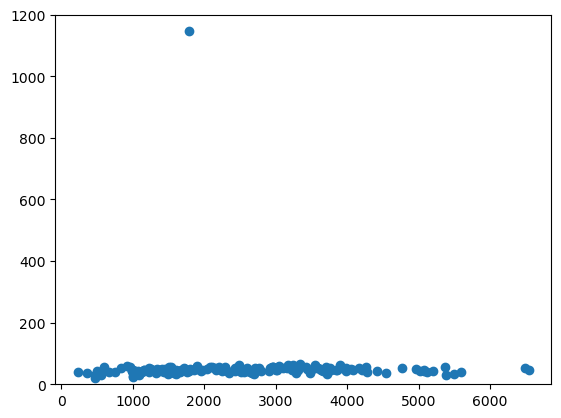

In [4]:
plt.scatter(df_2010_daily['Traded volumes (MWh)'],df_2010_daily['Average price (EUR/MWh)'])
plt.ylim(0,1200)

(0.0, 200.0)

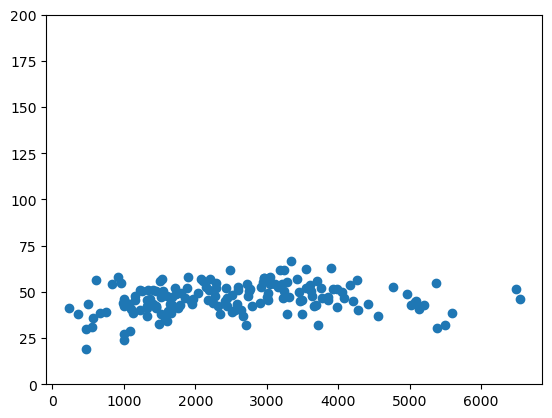

In [5]:
plt.scatter(df_2010_daily['Traded volumes (MWh)'],df_2010_daily['Average price (EUR/MWh)'])
plt.ylim(0,200)

In [6]:
df_2010_daily.describe()

Average price (EUR/MWh)  Traded volumes (MWh)
count               164.000000            164.000000
mean                 53.194845           2550.568293
std                  86.384851           1331.112190
min                  19.148125            231.000000
25%                  42.065656           1484.875000
50%                  46.433937           2432.750000
75%                  52.313781           3450.375000
max                1147.955958           6541.100000

In [7]:
df_2010_hourly['Hour'] = df_2010_hourly['Hours\n'].str.extract('(\d+)').astype(int)

<Axes: xlabel='Hour'>

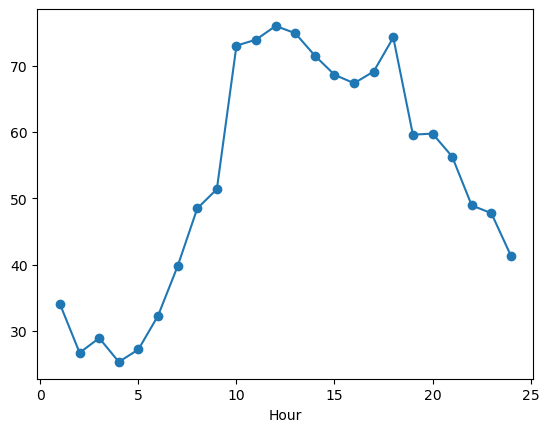

In [8]:
df_2010_hourly.groupby('Hour')['Prices (EUR/MWh)'].mean().sort_index(ascending=True)[0:24].plot(marker='o')

<Axes: xlabel='Hour'>

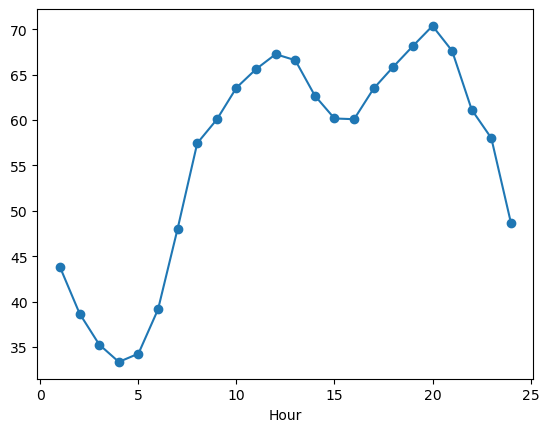

In [9]:
df_2011_hourly['Hour'] = df_2011_hourly['Hours'].str.extract('(\d+)').astype(int)
df_2011_hourly.groupby('Hour')['Prices (EUR/MWh)'].mean().sort_index(ascending=True)[0:24].plot(marker='o')

In [10]:
df_2010_hourly=df_2010_hourly.rename(columns={'Hours\n':'Hours'})

In [11]:
df_2012_hourly

Date Hours  Price (EUR/MWh)  Traded volumes (MWh)
0    2012-01-01    H1           23.045                 481.5
1    2012-01-01    H2           15.036                 552.5
2    2012-01-01    H3            3.458                 624.5
3    2012-01-01    H4            0.107                 667.7
4    2012-01-01    H5            0.105                 666.8
...         ...   ...              ...                   ...
8780 2012-12-31   H20           80.060                1042.3
8781 2012-12-31   H21           37.090                 962.4
8782 2012-12-31   H22            7.270                 919.1
8783 2012-12-31   H23            8.580                 921.0
8784 2012-12-31   H24            1.250                 898.1

[8785 rows x 4 columns]

In [12]:
df_2012_hourly=df_2012_hourly.rename(columns={'Price (EUR/MWh)':'Prices (EUR/MWh)'})

In [13]:
hourly_dfs=[df_2010_hourly,df_2011_hourly,df_2012_hourly,df_2013_hourly,df_2014_hourly,df_2015_hourly,df_2016_hourly,df_2017_hourly]

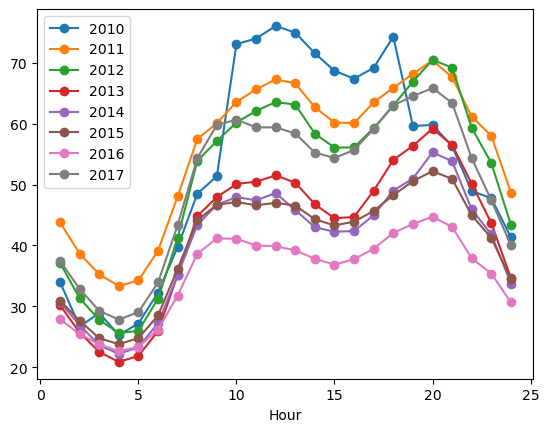

In [14]:
for temp_df in hourly_dfs:
    temp_df['Hour'] = temp_df['Hours'].dropna().str.extract('(\d+)').astype(int)
    temp_df.groupby('Hour')['Prices (EUR/MWh)'].mean().sort_index(ascending=True)[0:24].dropna().plot(marker='o')
    plt.legend(['2010','2011', '2012','2013','2014','2015','2016','2017'])

In [15]:
df_2013_daily

Date  Average prices (EUR/MWh)  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0   2013-01-01                  8.605000         NaN         NaN         NaN   
1   2013-01-02                 35.729583         NaN         NaN         NaN   
2   2013-01-03                 45.995000         NaN         NaN         NaN   
3   2013-01-04                 37.777500         NaN         NaN         NaN   
4   2013-01-05                 37.351667         NaN         NaN         NaN   
..         ...                       ...         ...         ...         ...   
360 2013-12-27                 34.847500      1456.0       444.0  620.666667   
361 2013-12-28                 54.912917      1456.0       444.0  604.708333   
362 2013-12-29                 53.641667      1456.0       444.0  712.708333   
363 2013-12-30                 30.905000      1456.0       444.0  945.583333   
364 2013-12-31                 50.587917      1456.0       444.0  803.583333   

      Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0            NaN         NaN         NaN         NaN         NaN  
1            NaN         NaN         NaN         NaN         NaN  
2            NaN         NaN         NaN         NaN         NaN  
3            NaN         NaN         NaN         NaN         NaN  
4            NaN         NaN         NaN         NaN         NaN  
..           ...         ...         ...         ...         ...  
360  2379.333333    0.000000  430.187500   75.037500   88.604167  
361  2395.291667    0.000000  399.695833    0.000000  291.462500  
362  2287.291667    0.000000  393.866667    8.420833  165.145833  
363  2054.416667    0.316667  380.495833    8.766667  157.862500  
364  2196.416667    0.000000  409.570833    3.595833  162.987500  

[365 rows x 10 columns]

In [16]:
df_2010_daily

Date  Average price (EUR/MWh)  Traded volumes (MWh)
0    2010.07.21                47.803208                2278.1
1    2010.07.22                58.061250                 917.6
2    2010.07.23                46.146042                1004.3
3    2010.07.24                43.593292                 496.0
4    2010.07.25                19.148125                 468.0
..          ...                      ...                   ...
159  2010.12.27                55.974958                3701.4
160  2010.12.28                42.750333                3693.6
161  2010.12.29                49.985208                4059.6
162  2010.12.30                50.574417                3624.9
163  2010.12.31                41.566583                3979.2

[164 rows x 3 columns]

(0.0, 100.0)

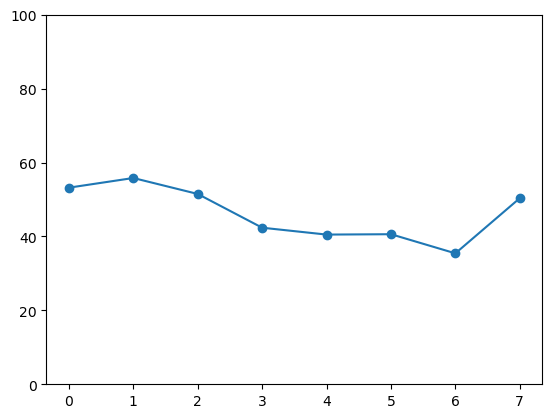

In [17]:
yearly_prices=[]
yearly_prices.append(df_2010_daily['Average price (EUR/MWh)'].mean())
yearly_prices.append(df_2011_daily['Average price (EUR/MWh)'].mean())
yearly_prices.append(df_2012_daily['Average price (EUR/MWh)'].mean())
yearly_prices.append(df_2013_daily['Average prices (EUR/MWh)'].mean())
yearly_prices.append(df_2014_daily['Average Prices (EUR/MWh)'].mean())
yearly_prices.append(df_2015_daily['Average Prices (EUR/MWh)'].mean())
yearly_prices.append(df_2016_daily['Average Prices (EUR/MWh)'].mean())
yearly_prices.append(df_2017_daily['Average Prices (EUR/MWh)'].mean())
plt.plot(yearly_prices , marker='o')
plt.ylim((0,100))

In [18]:
df_2010_daily['Date']=pd.to_datetime(df_2010_daily['Date'])

In [19]:
df_2014_daily['Date']=pd.to_datetime(df_2014_daily['Date'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\2946673275.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2014_daily['Date']=pd.to_datetime(df_2014_daily['Date'])


In [20]:
df_2015_daily['Date']=pd.to_datetime(df_2015_daily['Date'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\1365372311.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2015_daily['Date']=pd.to_datetime(df_2015_daily['Date'])


In [21]:
df_2016_daily['Date']=pd.to_datetime(df_2016_daily['Date'])
df_2017_daily['Date']=pd.to_datetime(df_2017_daily['Date'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\3750607955.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2016_daily['Date']=pd.to_datetime(df_2016_daily['Date'])
C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\3750607955.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2017_daily['Date']=pd.to_datetime(df_2017_daily['Date'])


In [22]:
df_2010_daily['Month']=df_2010_daily['Date'].dt.month
df_2011_daily['Month']=df_2011_daily['Date'].dt.month
df_2012_daily['Month']=df_2012_daily['Date'].dt.month
df_2013_daily['Month']=df_2013_daily['Date'].dt.month
df_2014_daily['Month']=df_2014_daily['Date'].dt.month
df_2015_daily['Month']=df_2015_daily['Date'].dt.month
df_2016_daily['Month']=df_2016_daily['Date'].dt.month
df_2017_daily['Month']=df_2017_daily['Date'].dt.month

In [23]:
df_2010_daily.rename(columns={'Average price (EUR/MWh)':'Average Prices (EUR/MWh)'},inplace=True)
df_2011_daily.rename(columns={'Average price (EUR/MWh)':'Average Prices (EUR/MWh)'},inplace=True)
df_2012_daily.rename(columns={'Average price (EUR/MWh)':'Average Prices (EUR/MWh)'},inplace=True)
df_2013_daily.rename(columns={'Average prices (EUR/MWh)':'Average Prices (EUR/MWh)'},inplace=True)


In [24]:
daily_dfs=[df_2010_daily,df_2011_daily,df_2012_daily,df_2013_daily,df_2014_daily,df_2015_daily,df_2016_daily,df_2017_daily]

In [25]:
monthly_avg_2010=df_2010_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()

In [26]:
month_2010=monthly_avg_2010.index.to_list()
year_2010=[2010]*len(month_2010)

In [27]:
multi_index_2010 = pd.MultiIndex.from_arrays([year_2010, month_2010], names=('Year', 'Month'))

In [28]:
monthly_avg_2010.index = multi_index_2010

In [29]:
monthly_avg_2010

Year  Month
2010  7        42.636629
      8        76.112587
      9        46.093447
      10       50.435449
      11       47.319529
      12       49.341073
Name: Average Prices (EUR/MWh), dtype: float64

In [30]:
monthly_avg_2011=df_2011_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2011=monthly_avg_2011.index.to_list()
year_2011=[2011]*len(month_2011)
multi_index_2011 = pd.MultiIndex.from_arrays([year_2011, month_2011], names=('Year', 'Month'))
monthly_avg_2011.index = multi_index_2011
monthly_avg_2011

Year  Month
2011  1.0      50.033812
      2.0      51.160926
      3.0      53.943800
      4.0      52.013781
      5.0      56.392832
      6.0      52.759782
      7.0      54.150047
      8.0      54.908613
      9.0      65.210103
      10.0     55.445212
      11.0     66.384290
      12.0     57.289405
Name: Average Prices (EUR/MWh), dtype: float64

In [31]:
monthly_avg_2012=df_2012_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2012=monthly_avg_2012.index.to_list()
year_2012=[2012]*len(month_2012)
multi_index_2012 = pd.MultiIndex.from_arrays([year_2012, month_2012], names=('Year', 'Month'))
monthly_avg_2012.index = multi_index_2012
monthly_avg_2012

Year  Month
2012  1        56.061082
      2        75.849869
      3        48.342677
      4        51.416203
      5        41.898837
      6        42.788275
      7        57.056359
      8        60.778313
      9        49.378639
      10       46.609474
      11       46.354653
      12       42.439651
Name: Average Prices (EUR/MWh), dtype: float64

In [32]:
monthly_avg_2013=df_2013_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2013=monthly_avg_2013.index.to_list()
year_2013=[2013]*len(month_2013)
multi_index_2013 = pd.MultiIndex.from_arrays([year_2013, month_2013], names=('Year', 'Month'))
monthly_avg_2013.index = multi_index_2013
monthly_avg_2013

Year  Month
2013  1        44.392487
      2        44.770967
      3        37.356784
      4        36.855000
      5        28.771089
      6        33.911556
      7        44.687581
      8        47.423226
      9        46.556514
      10       50.402838
      11       41.127278
      12       51.816277
Name: Average Prices (EUR/MWh), dtype: float64

In [33]:
monthly_avg_2014=df_2014_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2014=monthly_avg_2014.index.to_list()
year_2014=[2014]*len(month_2014)
multi_index_2014 = pd.MultiIndex.from_arrays([year_2014, month_2014], names=('Year', 'Month'))
monthly_avg_2014.index = multi_index_2014
monthly_avg_2014

Year  Month
2014  1        40.336317
      2        37.633125
      3        36.829975
      4        41.042639
      5        39.086263
      6        41.129417
      7        41.650296
      8        37.143508
      9        38.584000
      10       49.395067
      11       43.008972
      12       39.972016
Name: Average Prices (EUR/MWh), dtype: float64

In [34]:
monthly_avg_2015=df_2015_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2015=monthly_avg_2015.index.to_list()
year_2015=[2015]*len(month_2015)
multi_index_2015 = pd.MultiIndex.from_arrays([year_2015, month_2015], names=('Year', 'Month'))
monthly_avg_2015.index = multi_index_2015
monthly_avg_2015

Year  Month
2015  1        41.589301
      2        41.539494
      3        36.483485
      4        36.918569
      5        34.160269
      6        35.614375
      7        50.845376
      8        41.828723
      9        42.303569
      10       43.450905
      11       40.330833
      12       42.005753
Name: Average Prices (EUR/MWh), dtype: float64

In [35]:
monthly_avg_2016=df_2016_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2016=monthly_avg_2016.index.to_list()
year_2016=[2016]*len(month_2016)
multi_index_2016 = pd.MultiIndex.from_arrays([year_2016, month_2016], names=('Year', 'Month'))
monthly_avg_2016.index = multi_index_2016
monthly_avg_2016

Year  Month
2016  1        40.006788
      2        28.387170
      3        30.398298
      4        31.815194
      5        30.053602
      6        34.499431
      7        35.020255
      8        33.387567
      9        36.844042
      10       40.954422
      11       36.589208
      12       46.641586
Name: Average Prices (EUR/MWh), dtype: float64

In [36]:
monthly_avg_2017=df_2017_daily.groupby('Month')['Average Prices (EUR/MWh)'].mean()
month_2017=monthly_avg_2017.index.to_list()
year_2017=[2017]*len(month_2017)
multi_index_2017 = pd.MultiIndex.from_arrays([year_2017, month_2017], names=('Year', 'Month'))
monthly_avg_2017.index = multi_index_2017
monthly_avg_2017

Year  Month
2017  1        73.532097
      2        49.620149
      3        44.333903
      4        43.666778
      5        45.418642
      6        47.809056
      7        51.714247
      8        49.024167
      9        47.276889
      10       52.500387
      11       59.189736
      12       39.985282
Name: Average Prices (EUR/MWh), dtype: float64

In [37]:
month_avg_df=pd.concat([monthly_avg_2010,monthly_avg_2011,monthly_avg_2012,monthly_avg_2013,monthly_avg_2014,monthly_avg_2015,monthly_avg_2016,monthly_avg_2017])

In [38]:
month_avg_df=month_avg_df.reset_index()

In [39]:
month_avg_df

Year  Month  Average Prices (EUR/MWh)
0   2010    7.0                 42.636629
1   2010    8.0                 76.112587
2   2010    9.0                 46.093447
3   2010   10.0                 50.435449
4   2010   11.0                 47.319529
..   ...    ...                       ...
85  2017    8.0                 49.024167
86  2017    9.0                 47.276889
87  2017   10.0                 52.500387
88  2017   11.0                 59.189736
89  2017   12.0                 39.985282

[90 rows x 3 columns]

In [40]:
month_avg_df['Date'] = pd.to_datetime(month_avg_df[['Year', 'Month']].assign(DAY=1))
month_avg_df

Year  Month  Average Prices (EUR/MWh)       Date
0   2010    7.0                 42.636629 2010-07-01
1   2010    8.0                 76.112587 2010-08-01
2   2010    9.0                 46.093447 2010-09-01
3   2010   10.0                 50.435449 2010-10-01
4   2010   11.0                 47.319529 2010-11-01
..   ...    ...                       ...        ...
85  2017    8.0                 49.024167 2017-08-01
86  2017    9.0                 47.276889 2017-09-01
87  2017   10.0                 52.500387 2017-10-01
88  2017   11.0                 59.189736 2017-11-01
89  2017   12.0                 39.985282 2017-12-01

[90 rows x 4 columns]

In [41]:
month_avg_df.set_index('Date', inplace=True)

In [42]:
month_avg_df['Month_Year'] = month_avg_df['Month'].astype(str) + ' ' + month_avg_df['Year'].astype(str)


In [43]:
fig = px.line(month_avg_df.iloc[15:31], x='Month_Year', y='Average Prices (EUR/MWh)', markers=True, title='Price Over Time')
fig.update_xaxes(tickangle=45)
fig.show()

In [44]:
month_avg_df

Year  Month  Average Prices (EUR/MWh) Month_Year
Date                                                        
2010-07-01  2010    7.0                 42.636629   7.0 2010
2010-08-01  2010    8.0                 76.112587   8.0 2010
2010-09-01  2010    9.0                 46.093447   9.0 2010
2010-10-01  2010   10.0                 50.435449  10.0 2010
2010-11-01  2010   11.0                 47.319529  11.0 2010
...          ...    ...                       ...        ...
2017-08-01  2017    8.0                 49.024167   8.0 2017
2017-09-01  2017    9.0                 47.276889   9.0 2017
2017-10-01  2017   10.0                 52.500387  10.0 2017
2017-11-01  2017   11.0                 59.189736  11.0 2017
2017-12-01  2017   12.0                 39.985282  12.0 2017

[90 rows x 4 columns]

In [45]:
df_2017_daily['Average Prices (EUR/MWh)']

0      41.254167
1      49.707083
2      62.140417
3      55.971250
4      55.151667
         ...    
360    30.209583
361    33.220417
362    23.760000
363    24.729167
364    11.800833
Name: Average Prices (EUR/MWh), Length: 365, dtype: float64

In [46]:
fig = px.scatter(df_2015_daily, x='Date', y='Average Prices (EUR/MWh)', title='Price Over Time')
fig.update_xaxes(tickangle=45)
fig.show()

In [47]:
month_avg_df['season']=month_avg_df['Month'].apply(lambda x:1 if x in [10,11,12,1,2] else 0)

In [48]:
month_avg_df.groupby(['Year','season'])['Average Prices (EUR/MWh)'].sum()

Year  season
2010  0         164.842663
      1         147.096051
2011  0         389.378957
      1         280.313645
2012  0         351.659303
      1         267.314728
2013  0         275.561749
      1         232.509847
2014  0         275.466098
      1         210.345498
2015  0         278.154367
      1         208.916286
2016  0         232.018390
      1         192.579174
2017  0         329.243681
      1         274.827651
Name: Average Prices (EUR/MWh), dtype: float64

In [49]:
sigma=df_2010_hourly.iloc[624:633]['Prices (EUR/MWh)'].sum()+df_2010_hourly.iloc[642:648]['Prices (EUR/MWh)'].sum()
me=sigma/15
df_2010_hourly.loc[633:641, 'Prices (EUR/MWh)'] = me
outlier_price_update=df_2010_hourly.iloc[624:648]['Prices (EUR/MWh)'].mean()
index=df_2010_daily['Average Prices (EUR/MWh)'].idxmax()
df_2010_daily.loc[index, 'Average Prices (EUR/MWh)'] = outlier_price_update

In [50]:
df_2011_hourly[df_2011_hourly['Prices (EUR/MWh)']<=10]['Hours'].value_counts()

H4     13
H5     11
H3     10
H7      9
H6      8
H8      8
H2      6
H9      3
H1      3
H24     2
H10     1
Name: Hours, dtype: int64

In [51]:
month_avg_df.groupby('Month')['Average Prices (EUR/MWh)'].mean()

Month
1.0     49.421698
2.0     46.994529
3.0     41.098418
4.0     41.961166
5.0     39.397362
6.0     41.215984
7.0     47.220099
8.0     50.075838
9.0     46.530900
10.0    48.649219
11.0    47.538063
12.0    46.186380
Name: Average Prices (EUR/MWh), dtype: float64

In [52]:
df_2010_hourly

Date Hours  Prices (EUR/MWh)  Traded Volume  (MWh)  Hour
0    2010-07-21    H1            39.287                  96.1     1
1    2010-07-21    H2            35.925                 108.6     2
2    2010-07-21    H3            33.223                  91.4     3
3    2010-07-21    H4            30.842                  86.3     4
4    2010-07-21    H5            33.395                  94.7     5
...         ...   ...               ...                   ...   ...
3932 2010-12-31   H20            54.540                 194.8    20
3933 2010-12-31   H21            45.004                 122.9    21
3934 2010-12-31   H22            42.040                 106.8    22
3935 2010-12-31   H23            44.964                 200.7    23
3936 2010-12-31   H24            40.554                 268.0    24

[3937 rows x 5 columns]

## Feature Engineering and Final Dataset creation

In [53]:
final_df=pd.concat(hourly_dfs)[['Date','Hour','Prices (EUR/MWh)']]

In [54]:
final_df['Date']=pd.to_datetime(final_df['Date'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\2325853128.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [55]:
final_df['Year']=final_df['Date'].dt.year

In [56]:
final_df['Month']=final_df['Date'].dt.month

In [57]:
final_df

Date  Hour  Prices (EUR/MWh)    Year  Month
0    2010-07-21   1.0            39.287  2010.0    7.0
1    2010-07-21   2.0            35.925  2010.0    7.0
2    2010-07-21   3.0            33.223  2010.0    7.0
3    2010-07-21   4.0            30.842  2010.0    7.0
4    2010-07-21   5.0            33.395  2010.0    7.0
...         ...   ...               ...     ...    ...
8756 2017-12-31  20.0            17.170  2017.0   12.0
8757 2017-12-31  21.0            10.300  2017.0   12.0
8758 2017-12-31  22.0             6.440  2017.0   12.0
8759 2017-12-31  23.0            10.300  2017.0   12.0
8760 2017-12-31  24.0            15.050  2017.0   12.0

[65309 rows x 5 columns]

In [58]:
final_df.dropna(inplace=True)

In [59]:
final_df['hour_sin'] = np.sin(2 * np.pi * final_df['Hour'] / 24)
final_df['hour_cos'] = np.cos(2 * np.pi * final_df['Hour'] / 24)

In [60]:
final_df['month_sin'] = np.sin(2 * np.pi * final_df['Month'] / final_df['Month'].max())
final_df['month_cos'] = np.cos(2 * np.pi * final_df['Month'] / final_df['Month'].max())

In [61]:
final_df['year_weight']=final_df['Year'].apply(lambda x:1 if x==2017 else 0)

In [62]:
final_df['week']=final_df['Date'].dt.week

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\142766892.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [63]:
final_df['sin_week'] = np.sin(2 * np.pi * final_df['week'] / 7)
final_df['cos_week'] = np.cos(2 * np.pi * final_df['week'] / 7)

In [64]:
final_df['Day']=final_df['Date'].dt.day
final_df['sin_day'] = np.sin(2 * np.pi * final_df['Day'] / 31)
final_df['cos_day'] = np.cos(2 * np.pi * final_df['Day'] / 31)

In [65]:
def encode_year(years):
    y=[]
    for x in years.values.tolist():
         if x==2010:
            y.append(1)
         elif x==2011:
             y.append(2)
         elif x==2012:
             y.append(3)
         elif x==2013:
             y.append(4)
         elif x==2014:
             y.append(5)
         elif x==2015:
             y.append(6)
         elif x==2016:
             y.append(7)
         elif x==2017:
             y.append(8)
    return y

In [66]:
final_df['encoded_year']=encode_year(final_df['Year'])

In [67]:
final_df

Date  Hour  Prices (EUR/MWh)    Year  Month      hour_sin  \
0    2010-07-21   1.0            39.287  2010.0    7.0  2.588190e-01   
1    2010-07-21   2.0            35.925  2010.0    7.0  5.000000e-01   
2    2010-07-21   3.0            33.223  2010.0    7.0  7.071068e-01   
3    2010-07-21   4.0            30.842  2010.0    7.0  8.660254e-01   
4    2010-07-21   5.0            33.395  2010.0    7.0  9.659258e-01   
...         ...   ...               ...     ...    ...           ...   
8756 2017-12-31  20.0            17.170  2017.0   12.0 -8.660254e-01   
8757 2017-12-31  21.0            10.300  2017.0   12.0 -7.071068e-01   
8758 2017-12-31  22.0             6.440  2017.0   12.0 -5.000000e-01   
8759 2017-12-31  23.0            10.300  2017.0   12.0 -2.588190e-01   
8760 2017-12-31  24.0            15.050  2017.0   12.0 -2.449294e-16   

      hour_cos     month_sin  month_cos  year_weight  week  sin_week  \
0     0.965926 -5.000000e-01  -0.866025            0    29  0.781831   
1     0.866025 -5.000000e-01  -0.866025            0    29  0.781831   
2     0.707107 -5.000000e-01  -0.866025            0    29  0.781831   
3     0.500000 -5.000000e-01  -0.866025            0    29  0.781831   
4     0.258819 -5.000000e-01  -0.866025            0    29  0.781831   
...        ...           ...        ...          ...   ...       ...   
8756  0.500000 -2.449294e-16   1.000000            1    52  0.433884   
8757  0.707107 -2.449294e-16   1.000000            1    52  0.433884   
8758  0.866025 -2.449294e-16   1.000000            1    52  0.433884   
8759  0.965926 -2.449294e-16   1.000000            1    52  0.433884   
8760  1.000000 -2.449294e-16   1.000000            1    52  0.433884   

      cos_week  Day       sin_day   cos_day  encoded_year  
0     0.623490   21 -8.978045e-01 -0.440394             1  
1     0.623490   21 -8.978045e-01 -0.440394             1  
2     0.623490   21 -8.978045e-01 -0.440394             1  
3     0.623490   21 -8.978045e-01 -0.440394             1  
4     0.623490   21 -8.978045e-01 -0.440394             1  
...        ...  ...           ...       ...           ...  
8756 -0.900969   31 -2.449294e-16  1.000000             8  
8757 -0.900969   31 -2.449294e-16  1.000000             8  
8758 -0.900969   31 -2.449294e-16  1.000000             8  
8759 -0.900969   31 -2.449294e-16  1.000000             8  
8760 -0.900969   31 -2.449294e-16  1.000000             8  

[65284 rows x 17 columns]

In [68]:
X=final_df[['hour_sin','hour_cos','month_sin','month_cos','year_weight']]
y=final_df['Prices (EUR/MWh)']

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rfr=RandomForestRegressor()
rfr.fit(X,y)

RandomForestRegressor()

In [71]:
from sklearn.model_selection import GroupKFold,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
gkf=GroupKFold(n_splits=8)
scores = -cross_val_score(rfr, X, y, scoring="r2", cv=gkf.split(X, y, groups=final_df['Year']))

print(f'Training RMSE: {mean_squared_error(y, rfr.predict(X), squared=False):.2f}')
print(f"Cross validation RMSE: {scores.mean():.2f}")
print(f"R2 Variance : {r2_score(y,rfr.predict(X)):.2f}")


Training RMSE: 16.77
Cross validation RMSE: -0.15
R2 Variance : 0.36


In [72]:
from sklearn.ensemble import HistGradientBoostingRegressor
xgboost=HistGradientBoostingRegressor()
xgboost.fit(X,y)

HistGradientBoostingRegressor()

In [73]:
gkf=GroupKFold(n_splits=8)
scores = -cross_val_score(xgboost, X, y, scoring="neg_root_mean_squared_error", cv=gkf.split(X, y, groups=final_df['Year']))

print(f'Training RMSE: {mean_squared_error(y, xgboost.predict(X), squared=False):.2f}')
print(f"Cross validation RMSE: {scores.mean():.2f}")


Training RMSE: 16.79
Cross validation RMSE: 17.27


In [112]:
df_2018_hourly=df_2014_hourly.copy()

In [113]:
df_2018_hourly['Date']=pd.to_datetime(df_2018_hourly['Date'])+pd.DateOffset(years=4)

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\3137374477.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [114]:
df_2018_hourly.drop(columns='Prices (EUR/MWh)',inplace=True)

In [115]:
df_2018_hourly.head()

Date Hours  Hour
0 2018-01-01    H1     1
1 2018-01-01    H2     2
2 2018-01-01    H3     3
3 2018-01-01    H4     4
4 2018-01-01    H5     5

In [116]:
df_2018_hourly['Month']=df_2018_hourly['Date'].dt.month
df_2018_hourly['Year']=df_2018_hourly['Date'].dt.year
df_2018_hourly['hour_sin'] = np.sin(2 * np.pi * df_2018_hourly['Hour'] / 24)
df_2018_hourly['hour_cos'] = np.cos(2 * np.pi * df_2018_hourly['Hour'] / 24)
df_2018_hourly['month_sin'] = np.sin(2 * np.pi * df_2018_hourly['Month'] / df_2018_hourly['Month'].max())
df_2018_hourly['month_cos'] = np.cos(2 * np.pi * df_2018_hourly['Month'] / df_2018_hourly['Month'].max())

In [117]:
df_2018_hourly['week']=df_2018_hourly['Date'].dt.week

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\2707566132.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [118]:
df_2018_hourly['sin_week'] = np.sin(2 * np.pi * df_2018_hourly['week'] / 7)
df_2018_hourly['cos_week'] = np.cos(2 * np.pi * df_2018_hourly['week'] / 7)

In [119]:
df_2018_hourly['Day']=df_2018_hourly['Date'].dt.day
df_2018_hourly['sin_day'] = np.sin(2 * np.pi * df_2018_hourly['Day'] / 31)
df_2018_hourly['cos_day'] = np.cos(2 * np.pi * df_2018_hourly['Day'] / 31)

In [120]:
df_2018_hourly['year_weight']=0


In [121]:
df_2018_hourly['encoded_year']=8

In [122]:
df_2018_hourly

Date Hours  Hour  Month  Year      hour_sin  hour_cos  \
0    2018-01-01    H1     1      1  2018  2.588190e-01  0.965926   
1    2018-01-01    H2     2      1  2018  5.000000e-01  0.866025   
2    2018-01-01    H3     3      1  2018  7.071068e-01  0.707107   
3    2018-01-01    H4     4      1  2018  8.660254e-01  0.500000   
4    2018-01-01    H5     5      1  2018  9.659258e-01  0.258819   
...         ...   ...   ...    ...   ...           ...       ...   
8755 2018-12-31   H20    20     12  2018 -8.660254e-01  0.500000   
8756 2018-12-31   H21    21     12  2018 -7.071068e-01  0.707107   
8757 2018-12-31   H22    22     12  2018 -5.000000e-01  0.866025   
8758 2018-12-31   H23    23     12  2018 -2.588190e-01  0.965926   
8759 2018-12-31   H24    24     12  2018 -2.449294e-16  1.000000   

         month_sin  month_cos  week  sin_week  cos_week  Day       sin_day  \
0     5.000000e-01   0.866025     1  0.781831   0.62349    1  2.012985e-01   
1     5.000000e-01   0.866025     1  0.781831   0.62349    1  2.012985e-01   
2     5.000000e-01   0.866025     1  0.781831   0.62349    1  2.012985e-01   
3     5.000000e-01   0.866025     1  0.781831   0.62349    1  2.012985e-01   
4     5.000000e-01   0.866025     1  0.781831   0.62349    1  2.012985e-01   
...            ...        ...   ...       ...       ...  ...           ...   
8755 -2.449294e-16   1.000000     1  0.781831   0.62349   31 -2.449294e-16   
8756 -2.449294e-16   1.000000     1  0.781831   0.62349   31 -2.449294e-16   
8757 -2.449294e-16   1.000000     1  0.781831   0.62349   31 -2.449294e-16   
8758 -2.449294e-16   1.000000     1  0.781831   0.62349   31 -2.449294e-16   
8759 -2.449294e-16   1.000000     1  0.781831   0.62349   31 -2.449294e-16   

      cos_day  year_weight  encoded_year  
0     0.97953            0             8  
1     0.97953            0             8  
2     0.97953            0             8  
3     0.97953            0             8  
4     0.97953            0             8  
...       ...          ...           ...  
8755  1.00000            0             8  
8756  1.00000            0             8  
8757  1.00000            0             8  
8758  1.00000            0             8  
8759  1.00000            0             8  

[8760 rows x 17 columns]

In [123]:
final_df['Day']=final_df['Date'].dt.day_name()

In [124]:
final_df['weights']=final_df['Hour'].apply(lambda x:1000 if x>=10 and x<=20 else 1)

In [125]:
weights=final_df['weights'].values

## Using best model found out from trying different models section below i.e Randomforestregressor

In [126]:
X_train=final_df[(final_df['Year']>=2010) & (final_df['Year']<=2017)]

In [127]:
#X_test=final_df[final_df['Year']==2017]

In [128]:
train=X_train[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]

In [129]:
test=df_2018_hourly[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]

In [130]:
#test=X_test[['hour_sin','hour_cos','month_sin','month_cos','year_weight']]

In [131]:
y_train=X_train['Prices (EUR/MWh)']

In [132]:
#y_test=X_test['Prices (EUR/MWh)']

In [133]:
rfr=RandomForestRegressor(n_estimators=100,bootstrap=True)

In [134]:
rfr.fit(train,y_train)

RandomForestRegressor()

In [135]:
df_2018_hourly['pred']=rfr.predict(test)

In [136]:
#X_test['pred']=rfr.predict(test)

<Axes: xlabel='Hour'>

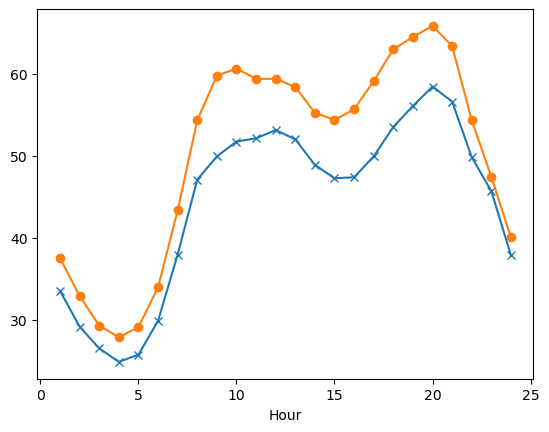

In [137]:
df_2018_hourly.groupby('Hour')['pred'].mean().sort_index(ascending=True)[0:24].plot(marker='x')
df_2017_hourly.groupby('Hour')['Prices (EUR/MWh)'].mean().sort_index(ascending=True)[0:24].plot(marker='o')

## Optimization Problem

In [138]:
jan_1_2018=df_2018_hourly[0:24][['Date','Hour','Month','Year','pred']]

In [139]:
jan_1_2018

Date  Hour  Month  Year       pred
0  2018-01-01     1      1  2018  31.394559
1  2018-01-01     2      1  2018  25.415664
2  2018-01-01     3      1  2018  15.785181
3  2018-01-01     4      1  2018   8.501297
4  2018-01-01     5      1  2018   8.180405
5  2018-01-01     6      1  2018   6.453501
6  2018-01-01     7      1  2018   5.041788
7  2018-01-01     8      1  2018   4.424281
8  2018-01-01     9      1  2018   6.619198
9  2018-01-01    10      1  2018  11.216815
10 2018-01-01    11      1  2018  16.130590
11 2018-01-01    12      1  2018  21.860837
12 2018-01-01    13      1  2018  24.278137
13 2018-01-01    14      1  2018  23.796026
14 2018-01-01    15      1  2018  23.565792
15 2018-01-01    16      1  2018  26.506511
16 2018-01-01    17      1  2018  38.011796
17 2018-01-01    18      1  2018  47.341817
18 2018-01-01    19      1  2018  48.206786
19 2018-01-01    20      1  2018  50.659174
20 2018-01-01    21      1  2018  46.588162
21 2018-01-01    22      1  2018  38.635670
22 2018-01-01    23      1  2018  37.396419
23 2018-01-01    24      1  2018  29.178972

In [140]:
fig = px.line(jan_1_2018, x='Hour', y='pred', markers=True, title='Hourly Prices for 1st Jan 2018')
fig.update_xaxes(tickangle=45)
vertical_lines_x = [7, 20]  # x-values where you want to add vertical lines
# for x in vertical_lines_x:
#     fig.add_shape(type="line", x0=x, y0=0, x1=x, y1=max(jan_1_2018['pred']),
#                   line=dict(color="red", width=2))
fig.update_layout(yaxis=dict(range=[0, 60]))
fig.show()

In [141]:
df_2018_hourly['pred'].mean()

44.367422513718694

In [142]:
p2e=jan_1_2018[(jan_1_2018['Hour']>=8) & (jan_1_2018['Hour']<=20)]['pred'].mean()

In [143]:
p1e=jan_1_2018[(jan_1_2018['Hour']>=0) & (jan_1_2018['Hour']<=7)]['pred'].mean()

In [144]:
p3e=jan_1_2018[(jan_1_2018['Hour']>=21) & (jan_1_2018['Hour']<=24)]['pred'].mean()

In [145]:
p1e_list=jan_1_2018[(jan_1_2018['Hour']>=0) & (jan_1_2018['Hour']<=7)]['pred'].values

In [146]:
p2e_list=jan_1_2018[(jan_1_2018['Hour']>=8) & (jan_1_2018['Hour']<=20)]['pred'].values

In [147]:
p3e_list=jan_1_2018[(jan_1_2018['Hour']>=21) & (jan_1_2018['Hour']<=24)]['pred'].values

In [148]:
jan_1_2018['pred'].values.tolist()

[31.394558778388273,
 25.415663596320346,
 15.785181440836944,
 8.501297142135646,
 8.180405265290263,
 6.4535013712121225,
 5.041787953990454,
 4.424281287157288,
 6.619197726190475,
 11.21681512157287,
 16.130590245920747,
 21.860836729076482,
 24.27813662409812,
 23.796026492063483,
 23.565792210511717,
 26.506510657009667,
 38.011795555555565,
 47.34181677261629,
 48.20678627461426,
 50.65917435858582,
 46.588162069264065,
 38.63567002347653,
 37.39641887307137,
 29.178972195526704]

In [149]:
import pulp

# Sample hourly prices from the power exchange (in $/MWh)
hourly_prices = jan_1_2018['pred'].values.tolist()
normalized_prices = (np.array(hourly_prices) - min(hourly_prices)) / (max(hourly_prices) - min(hourly_prices))

# Sample weights for each hour (just for demonstration)
hourly_weights = normalized_prices

# Define the problem as a minimization problem
problem = pulp.LpProblem("Energy_Sourcing_Optimization", pulp.LpMinimize)

# Decision variables
x_g = pulp.LpVariable.dicts("Grid_Energy_MWh", range(24))
x_e = pulp.LpVariable.dicts("Exchange_Energy_MWh", range(24))  # Energy purchased from exchange for each hour
# Objective function: Minimize the total cost
problem += pulp.lpSum([(57.62 * x_g[i] for i in range(24)),(hourly_prices[i] * x_e[i] * hourly_weights[i] for i in range(24))])

# Constraints
problem += sum(x_g[i] for i in range(24)) + sum(x_e[i] for i in range(24)) + 150 == 1200  # Total energy requirement
problem += 0.15 * sum(x_g[i] for i in range(24)) + 0.05 * sum(x_e[i] for i in range(24)) + 150 >= 0.22 * 1200  # At least 20% of energy from renewable sources
#Hourly energy balance constraint
for i in range(24):
    problem+= x_e[i]>=0
    problem+= x_g[i]>=0
    if i<11 or i>13:
        problem += x_g[i] + x_e[i] == 50  # Ensure total energy requirement is met for each hour
    else:
        problem+=x_g[i] + x_e[i] == 0

# Solve the problem
problem.solve()

# Print the results
sum_e=0
sum_g=0
for i in range(24):
    sum_e+=x_e[i].varValue
print("Grid energy (MWh):")
for i in range(24):
    sum_g+=x_g[i].varValue
print("Exchange energy (MWh):",sum_e)
print("Grid energy (MWh):",sum_g)
print("Solar energy (MWh):",150)
print("Total cost: Euro", pulp.value(problem.objective))


Grid energy (MWh):
Exchange energy (MWh): 435.0
Grid energy (MWh): 615.0
Solar energy (MWh): 150
Total cost: Euro 35959.52958191698


In [150]:
ep=dict()
gp=dict()
for i in range(24):
     ep[i+1]=x_e[i].varValue
for i in range(24):
    gp[i+1]=x_g[i].varValue

In [151]:
import plotly.graph_objects as go
ep_keys=list(ep.keys())
ep_values=list(ep.values())
gp_keys=list(gp.keys())
gp_values=list(gp.values())
fig = go.Figure()
fig.add_trace(go.Scatter(x=ep_keys, y=ep_values, mode='lines+markers', name='Exchange Values'))
fig.add_trace(go.Scatter(x=gp_keys, y=gp_values, mode='lines+markers', name='Grid Values'))
fig.add_trace(go.Scatter(x=[11,12,13], y=[50,50,50], mode='lines+markers', name='Solar'))
fig.update_layout(title='Energy Distribution', xaxis_title='Hour', yaxis_title='Energy')
fig.show()

## Trying different models

Random Forest

In [152]:
rfr3=RandomForestRegressor(n_estimators=100,bootstrap=True)

In [153]:
X_train2=final_df[(final_df['Year']>=2010) & (final_df['Year']<=2015)]
train2=X_train2[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
X_test=final_df[final_df['Year']==2016]
test=X_test[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
y_train2=X_train2['Prices (EUR/MWh)']
y_test=X_test['Prices (EUR/MWh)']
rfr3.fit(train2,y_train2)
X_test['pred']=rfr3.predict(test)

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\3733715790.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
r2=r2_score(y_test,X_test['pred'])
mse=mean_squared_error(y_test,X_test['pred'])
print(-1*r2)
print(mse**0.5)
Adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-test.shape[1]-1)
print(-1*Adj_r2)

0.6708593486894168
16.942026454953666
0.6721920760641691


Gradient Boosting

In [155]:
X_train3=final_df[(final_df['Year']>=2010) & (final_df['Year']<=2015)]
train3=X_train3[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
X_test1=final_df[final_df['Year']==2016]
test1=X_test1[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
y_train3=X_train3['Prices (EUR/MWh)']
y_test1=X_test1['Prices (EUR/MWh)']
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train3,y_train3)
X_test['pred_gbr']=gbr.predict(test1)

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\232488696.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
r2=r2_score(y_test,X_test['pred_gbr'])
mse=mean_squared_error(y_test,X_test['pred_gbr'])
print(-1*r2)
print(mse**0.5)
Adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-test.shape[1]-1)
print(-1*Adj_r2)

0.4210744980600436
15.624417384969648
0.4222079895694353


MLR

In [157]:
X_train4=final_df[(final_df['Year']>=2010) & (final_df['Year']<=2015)]
train4=X_train4[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
X_test2=final_df[final_df['Year']==2016]
test2=X_test2[['hour_sin','hour_cos','sin_day','cos_day','month_sin','month_cos','year_weight']]
y_train4=X_train4['Prices (EUR/MWh)']
y_test2=X_test2['Prices (EUR/MWh)']
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(train4,y_train4)
X_test['pred_MLR']=mlr.predict(test2)

C:\Users\vinay\AppData\Local\Temp\ipykernel_37924\4132859057.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
r2=r2_score(y_test,X_test['pred_MLR'])
mse=mean_squared_error(y_test,X_test['pred_MLR'])
print(-1*r2)
print(mse**0.5)
Adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-test.shape[1]-1)
print(-1*Adj_r2)

0.490143331666715
15.999611264627955
0.49133191454293046


(0.0, 90.0)

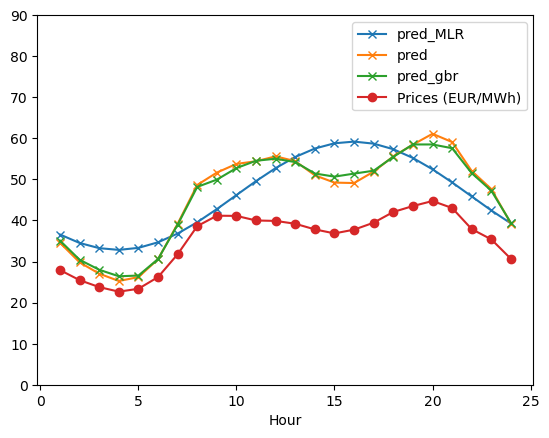

In [159]:
X_test.groupby('Hour')['pred_MLR'].mean().sort_index(ascending=True)[0:24].plot(marker='x')
X_test.groupby('Hour')['pred'].mean().sort_index(ascending=True)[0:24].plot(marker='x')
X_test.groupby('Hour')['pred_gbr'].mean().sort_index(ascending=True)[0:24].plot(marker='x')
df_2016_hourly.groupby('Hour')['Prices (EUR/MWh)'].mean().sort_index(ascending=True)[0:24].plot(marker='o')
plt.legend()
plt.ylim(0,90)

In [160]:
df_2018_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8760 non-null   datetime64[ns]
 1   Hours         8760 non-null   object        
 2   Hour          8760 non-null   int32         
 3   Month         8760 non-null   int64         
 4   Year          8760 non-null   int64         
 5   hour_sin      8760 non-null   float64       
 6   hour_cos      8760 non-null   float64       
 7   month_sin     8760 non-null   float64       
 8   month_cos     8760 non-null   float64       
 9   week          8760 non-null   int64         
 10  sin_week      8760 non-null   float64       
 11  cos_week      8760 non-null   float64       
 12  Day           8760 non-null   int64         
 13  sin_day       8760 non-null   float64       
 14  cos_day       8760 non-null   float64       
 15  year_weight   8760 non-null   int64   

In [161]:
daily_avg=[]
for i in range(0,8761,24):
    daily_avg.append(df_2018_hourly[i:i+24]['pred'].mean())

In [162]:
len(daily_avg)

366

In [163]:
daily_avg.pop()

nan

In [164]:
index=df_2018_hourly['Date'].unique()


In [165]:
df_2018_daily=pd.DataFrame(daily_avg,index=index,columns=['Average Prices (EUR/MWh)'])

In [166]:
fig = px.scatter(df_2018_daily, x=df_2018_daily.index, y='Average Prices (EUR/MWh)',title='Average Daily Price')
fig.update_xaxes(tickangle=45)
fig.show()

In [256]:
df_2018_daily.to_csv('Power Exchange Data_ 2018.csv')